## Use of Pandas, Numpy, Matplotlib and Seaborn with example

1. Pandas - used for working with datasets by converting it into a dataframe. 
    It also helps in cleaning (handling missing values, outliers etc) and manipulation of data 
2. Numpy - Numerical python used for mathematical calculations in datasets
3. Matplotlib and Seaborn - Used for Data Visualisation

### Example:

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r"E:\Meta scifor\Salaries.csv\Salaries.csv") #loading the data into a dataframe in pandas

In [141]:
df.info() #basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [142]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Data Cleaning

### Finding the Missing/Null values in the dataset

In [143]:
df.isna().sum() #prints the number of null values in each column

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [144]:
(df.isna().sum()/len(df))*100 #percentage of null values in each column of the dataset

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

As there are 74% missing values in the "Status" column and 100% in "Notes" column, let us drop those columns

In [145]:
df.drop(['Status','Notes'],axis=1,inplace=True)

In [146]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,San Francisco


As in some rows there are "Not Provided" entered in the rows of all columns as seen above, let us find that and remove it

In [147]:
(df['EmployeeName']=="Not provided").value_counts() #gives the number of rows with the condition mentioned.

False    148650
True          4
Name: EmployeeName, dtype: int64

In [148]:
df[df['EmployeeName']=="Not provided"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco


In [149]:
df.drop([148646,148650,148651,148652], axis=0, inplace=True) #dropping the rows with no information

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  object 
 4   OvertimePay       148650 non-null  object 
 5   OtherPay          148650 non-null  object 
 6   Benefits          112491 non-null  object 
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 13.6+ MB


In [151]:
df['BasePay'].astype(float)

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148645         0.00
148647         0.00
148648         0.00
148649         0.00
148653         0.00
Name: BasePay, Length: 148650, dtype: float64

In [156]:
df['Benefits'].astype(float)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
148645    0.0
148647    0.0
148648    0.0
148649    0.0
148653    0.0
Name: Benefits, Length: 148650, dtype: float64

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns         #importing data visualisation libraries

<Axes: >

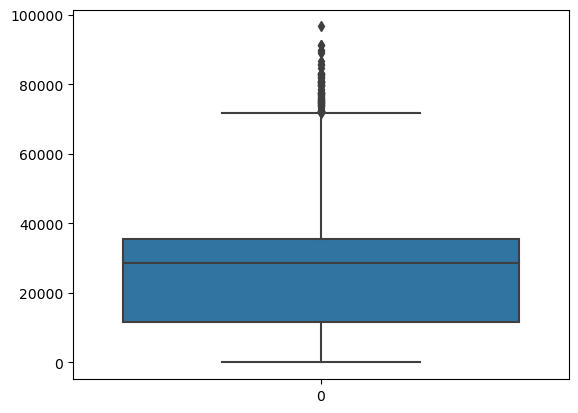

In [153]:
sns.boxplot(df["Benefits"]) #box plot showing outliers in df['Benefits'] column

<Axes: >

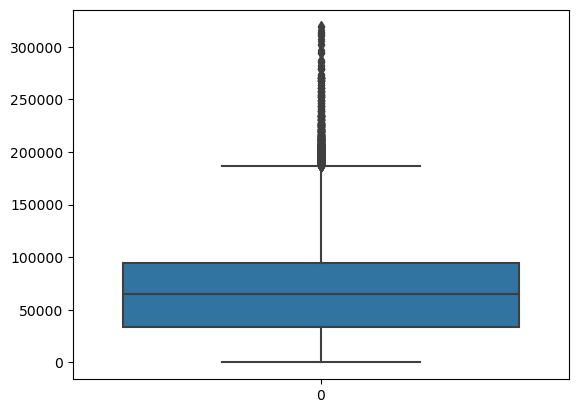

In [102]:
sns.boxplot(df['BasePay'])

From the above plot, it is seen that there are outliers in the Benefits column and Base Pay(skewed data), hence let us fill the missing values with median value

In [161]:
df['Benefits']=df['Benefits'].fillna(df['Benefits'].median())
df['BasePay']=df['BasePay'].fillna(df['BasePay'].median())

In [162]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

Thus all the missing values in the dataset are treated

In [163]:
df.columns #columns in the dataset

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

### Data Visualisation

### Bar chart

Text(0.5, 1.0, 'Bar chart showing Year wise Total Pay')

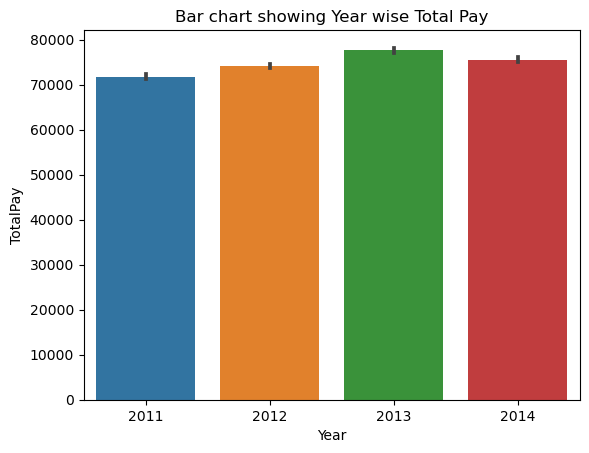

In [118]:
sns.barplot(df,x=df['Year'],y=df['TotalPay'])
plt.title("Bar chart showing Year wise Total Pay")

From the graph, it can be inferred that 2013 - had highest total pay and least in 2011

Text(0.5, 1.0, 'Bar chart showing Year wise Total Pay Benefits')

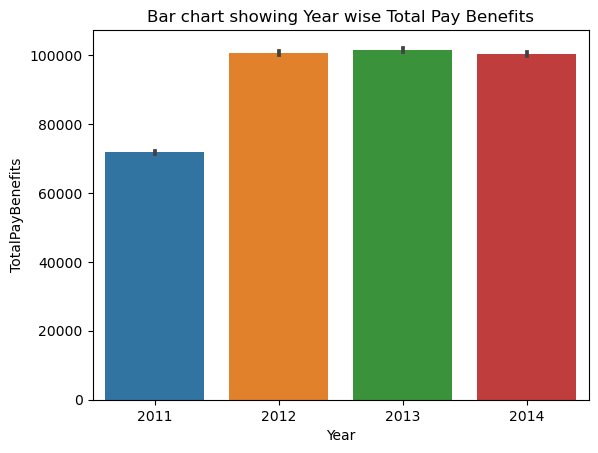

In [164]:
sns.barplot(df,x=df['Year'],y=df['TotalPayBenefits'])
plt.title("Bar chart showing Year wise Total Pay Benefits")

In [167]:
np.median(df['Benefits'].astype(float)) #Median Value of df['Benefits']

28628.62

In [169]:
np.mean(df['BasePay'].astype(float))# mean Base pay

66320.08463397242

Numpy --> thus can be used for mathematical computation in a particular column/series in a dataset

Text(0.5, 1.0, 'Histogram showing Total Pay Benefits')

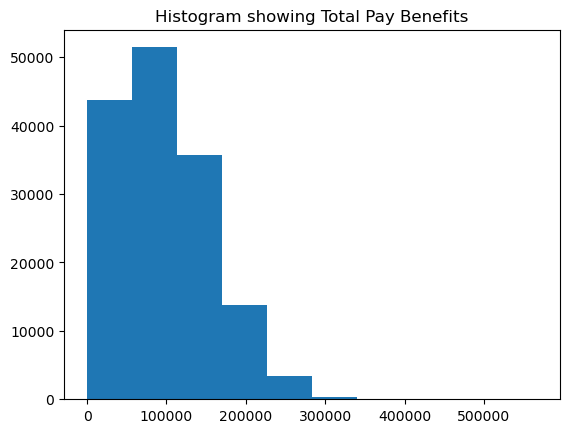

In [178]:
plt.hist(df['TotalPayBenefits'])
plt.title('Histogram showing Total Pay Benefits')

The distribution exhibits a clear leftward skew, indicating most values are concentrated on the lower end.